# Numerics 2 - LDV Python Course - 1 Exercise Sheet
# Wave Equation

The propagation of an electromagnetic wave in space, or the vibration of a drum, can be model by the following partial differential equation:

$$\frac{1}{\rho^2}\frac{\partial^{2}z}{\partial t^2}=\frac{\partial^{2}z}{\partial x^2} + \frac{\partial^{2}z}{\partial y^2} - \eta \frac{\partial z}{\partial t}$$

Normally, it is very difficult to solve this kind of equations analytically.

* In our thought experiment **z(x,y,t)** from the equation above represents the displacement in the vertical z axis of the membrane of the drum. The vertical displacement of the drum membrane depends on its position (x,y) within the grid and on the time t after the drummer has hit the drum.

* The constant coefficient $\rho$ (rho) represents the speed of wave propagation in the medium (how fast a wave travels through the drum head, it therefore changes the pitch of the sound created by the wave) and $\eta$ (eta) represents damping coefficient of the medium (how much energy and therefore amplitude a wave loses by travelling through the drum membrane).

**<font color=red>You DON'T have to change anything in the following 2 boxes with code. Leave it as it is!</font>**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import math
from IPython.display import HTML

%matplotlib inline


In [23]:
def gaussianDistribution(gridPoints, standardDeviation, amplitude, x_strike, y_strike, leftBoundary, rightBoundary):
    x = np.linspace(leftBoundary, rightBoundary, gridPoints)
    y = np.linspace(leftBoundary, rightBoundary, gridPoints)
    X, Y = np.meshgrid(x, y)

    z = amplitude*np.exp(standardDeviation*(np.power(X-x_strike,2)+np.power(Y-y_strike,2)))

    return z

Later when your code is up and running, you will be able to change the characteristics of your simulation by changing the following variables, in the first run just leave it as it is, so that you get nice results.

In [24]:
# (1) Declare physical properties of the drum membrane

meshDimension = 40  # Dimension of mesh grid in each direction

rho = 0.295  # Speed of wave propagation
# rho determines the pitch (nice value rho = 0.295)

eta = 2e-4  # damping coefficient (nice value eta = 2e-4)
# --> drum heads have a damping coefficient near to 0 => they are almost lossless

sampleFrequency = 44.1e3  # 48kHz Sampling frequency, more than double than
# human hearing range

audioLength = 0.5  # in seconds


# Exercise 1
Use the numpy function **arange()** to create a vector with the name **t** which goes from 0 to the value of the variable **audioLength** and all the points between 0 and **audioLength** should be by the distance $\frac{1}{sampleFrequency}$ apart from one another.

If you are unsure of how the function **arange()** works [check its documentation here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange).

In [25]:
# (2) Initialize time scale and audio signal

# Check documentation for numpy.arange
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange

t = np.arange(0, audioLength, 1/sampleFrequency)
# start audio time at 0 seconds, run through to audioLength
# sampling at the sampleFrequency

## Exercise 2

**z** in the following code box is a *matrix of matrix*, if you see its initialization with the function **zeros()** carefully, you will see that it has 3 parameters. Each matrix is **meshDimension** wide by **meshDimension** long, and we have *t.size* amount of matrices with the size **meshDimension** wide by **meshDimension**.

Let's recap this, because it is very important! In Exercise 1 we created a time vector **t** which has a size (or an amount of elements in it) which we can get by calling the method t.size. We want to have a matrix with the value of vertical displacement **z** of every point in the grid for every time step in t, which basically is the same as saving a matrix for every time step.

Now please create two more matrices, which should be called **z_t1** and **z_t2**, and should be **meshDimension** wide by **meshDimension** long. They should as well be initialized only with zeros. So use the np.zeros() function.

In [26]:
# (3) Initialize matrices for field at times t, t-1, t-2 and for
# input strike

z = np.zeros((meshDimension,meshDimension,t.size))  # current values of z displacement of
#  membrane grid
z_t1 = np.zeros((meshDimension,meshDimension))  # z displacement of membrane at time
#  t-1
z_t2 = np.zeros((meshDimension,meshDimension))  # z displacement of membrane at time
#  t-2

# Initialize the matrix that will later be filled with the initial
# conditions of the first strike on the membrane (gaussian distribution)

z_initial_conditions = np.zeros((meshDimension,meshDimension))



The following code should be familiar to you from the first exercise Jupyter Notebook. Do not change anything on the first run, when you have properly working code come back to this section and play around with the initial conditions. We are basically generating the way the vertical displacement **z** will look like when the drummer hits the drums at **t = 0**, which in turn is the matrix which you can access by calling **z[:,:,0]**

In [27]:
# (4) Initialize matrix for input strike with a gaussian distribution

amplitude = 0.8 # should be positive, determines height of input strike
leftBoundary = -1 # at what point in the x/y axis does the grid start
rightBoundary = 1 # at what point in the x/y axis does the grid end

x = np.linspace(leftBoundary, rightBoundary, meshDimension)
y = np.linspace(leftBoundary, rightBoundary, meshDimension)
X, Y = np.meshgrid(x, y) # create X,Y matrices with points in x/y space
# where equation will be solved

#  set position of the strike in the x, y axis
#  leftboundary < x,y_strike < rightBoundary
x_strike = x[(math.floor(x.size/2))]
y_strike = y[(math.floor(y.size/2))]
# use floor function to get an integer

standardDeviation = -40
#  the standard deviation will influence how wide
#  the gauss distribution will be
#  the boundary conditions of the border never being displaced
#  vertically (z-axis) must always be met

z_initial_conditions = gaussianDistribution(meshDimension,standardDeviation,amplitude,x_strike,y_strike,leftBoundary,rightBoundary)

## Where the magic happens

This is the code section that magically solves the partial differential equation for you. We definitely do not expect you to understand it right away, in fact the main section of this code, the part which actually solves the equation: 
```python
    z[2:n-1,2:n-1,i] = 1/(1+eta)*(rho *(z_t1[3:n, 2:n-1] + z_t1[
1:n-2,2:n-1]+z_t1[2:n- 1,3:n]+z_t1[
2:n-1,1:n-2]-4 * z_t1[2: n - 1,2: n- 1])+ 2* z_t1[2:n-1,2:n-1]-(1-eta)*(z_t2[2:n-1,2:n-1]))
```

Is basically going through all points of the grid (except the boundaries) and solving an equation for all time steps in **t**. Why this works is a story for another day, but basically we are approximating the partial differential equation through the *Taylor Series* of its derivatives. If you want to read more about how and why this method works, read more about it [here](http://people.ece.cornell.edu/land/courses/ece5760/LABS/s2018/WaveFDsoln.pdf), or search online for *Finite differences*, which is the name of this methodology for solving partial differential equations numerically.
***
You can also see that we are giving the matrix at time **t=0** the value of the initial conditions **z_initial_conditions** that we generated before. That is being done in the following line of code.

```python
z[:,:,0] = z_initial_conditions
```
**<font color=purple>VERY IMPORTANT </font>**
If you are working with matrices you should ALWAYS use this kind of notation. Avoid giving values to the elements in your matrices with *for-loops*, it makes your code more *unreadable* and inefficient.

The previous notation should be read as follows: ```z[rows,columns,matrix index]```, and if you use ":", you are saying "all rows" or "all columns" or "all elements".

```z[:,:,0] = z_initial_conditions``` means "all rows" and "all columns" of the matrix "0" should get the values of the matrix **z_initial_conditions**.



***

**<font color=red>You DON'T have to change anything in the following box with code. Leave it as it is! If you change anything here, the risk of your program not working at all increases dramatically :)</font>**

In [28]:
# (5) Solve the difference equation for all time-steps

# Before for-loop starts z must be the initial conditions
z[:,:,0] = z_initial_conditions
z_t1 = z_initial_conditions
z_t2 = z_initial_conditions
#TODO Try if it makes sense that the t-1 and t-2 are also initial conditions

n = meshDimension # use n to shorten the difference expression below

for i in range(t.size): # start a loop from 0 to last element of t

    z[2:n-1,2:n-1,i] = 1/(1+eta)*(rho *(z_t1[3:n, 2:n-1] + z_t1[
1:n-2,2:n-1]+z_t1[2:n- 1,3:n]+z_t1[
2:n-1,1:n-2]-4 * z_t1[2: n - 1,2: n- 1])+ 2* z_t1[2:n-1,2:n-1]-(1-eta)*(z_t2[2:n-1,2:n-1]))

    # TODO enforce boundary conditions here as well -> borders should be 0


    # update z at time t-1 and z at time t-2
    z_t2 = z_t1 # the value at t-2 is now what the value at t-1 was
    z_t1 = z[:,:,i] # in the next time step the actual z value will be in the past


## Exercise 3

You are almost there, now we plot the results. But we have to choose at which time we want to see the results. Remember that **z** is a matrix of matrices, it saved as many matrices as elements in your time vector **t**. So to plot **z** for a particular time we choose 
```python
plot = [ax.plot_surface(X, Y, z[:, :, i], cmap='viridis', edgecolor='none')]
```
```z[:, :, i]```all rows and all columns at time **i**.

* Pick an appropriate index i, it should be a natural number, and smaller than t.size -> it will show you the displacement of **z** at that particular moment **i**
* Experiment with many variables **i** and see how the plot changes!!



(0, 0.96)

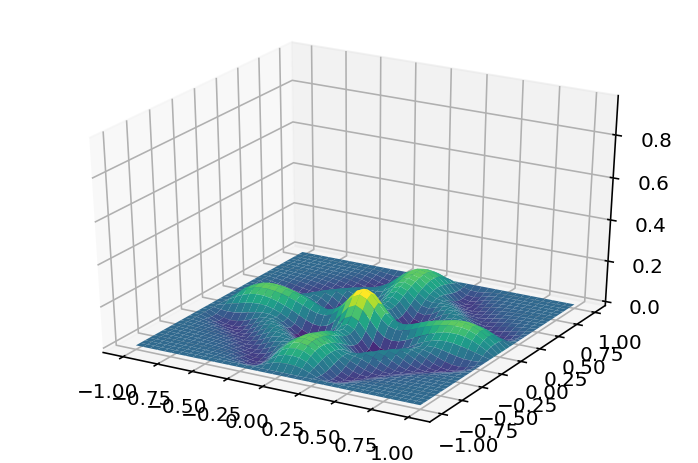

In [29]:
# (6) Plot for z
i = 77 # go ahead and change this variable i

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, z[:, :, i], cmap='viridis', edgecolor='none')]
ax.set_zlim(0, amplitude*1.2)





Congrats! You are probably more confused than when the class started, but you made it through. There is a python script which you can find in the gitlab repository, which will show you an animation of the static plot you are just seeing. So go check that script in the gitlab repository now!